# Prédiction de budget

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
##lire et afficher notre dataset
df = pd.read_csv("./movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<AxesSubplot:>

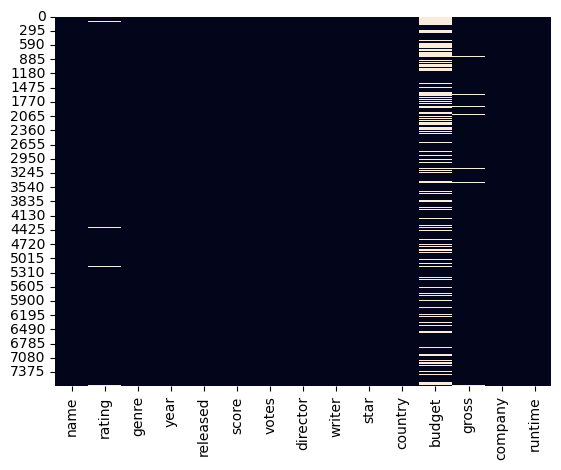

In [15]:
##visualiser les valeurs null de notre dataset
plt.figure()
sns.heatmap(df.isna(),cbar=False)

In [16]:
##Afficher la sommes des valeurs null pour chaque attribut
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [17]:
##Afficher les informations de notre dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Nettoyage des données

In [18]:
##Création du fonction "dropNull" qu'on va l'utiliser pour supprimer les lignes qui contiennent des valeurs manquantes 
##pour un nom d'attribut donné:
def dropNull(dataframe,col_name):
    movies = dataframe.dropna(subset=[col_name])
    return movies


In [19]:
df = dropNull(df,'rating')
df = dropNull(df,'released')
df =  dropNull(df,'writer')
df = dropNull(df,'star')
df = dropNull(df,'country')
df = dropNull(df,'company')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7576 non-null   object 
 1   rating    7576 non-null   object 
 2   genre     7576 non-null   object 
 3   year      7576 non-null   int64  
 4   released  7576 non-null   object 
 5   score     7575 non-null   float64
 6   votes     7575 non-null   float64
 7   director  7576 non-null   object 
 8   writer    7576 non-null   object 
 9   star      7576 non-null   object 
 10  country   7576 non-null   object 
 11  budget    5475 non-null   float64
 12  gross     7413 non-null   float64
 13  company   7576 non-null   object 
 14  runtime   7575 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 947.0+ KB


In [20]:
##Calcul de median pour les attributs score, votes, budget, runtime et gross
score_m = df["score"].median()
votes_m = df["votes"].median()
budget_m = df["budget"].median()
runtime_m = df["runtime"].median()
gross_m = df["gross"].median()

print(score_m)
print(budget_m)
print(votes_m)
print(runtime_m)
print(gross_m)

6.5
21000000.0
33000.0
104.0
20419446.0


In [21]:
##Remplacer les valeurs null des attributs score, votes, budget, runtime et gross avec leurs median
df['score'][df['score'].isnull()]=score_m
df['votes'][df['votes'].isnull()]=votes_m
df['budget'][df['budget'].isnull()]=budget_m
df['runtime'][df['runtime'].isnull()]=runtime_m
df['gross'][df['gross'].isnull()]=gross_m


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7576 non-null   object 
 1   rating    7576 non-null   object 
 2   genre     7576 non-null   object 
 3   year      7576 non-null   int64  
 4   released  7576 non-null   object 
 5   score     7576 non-null   float64
 6   votes     7576 non-null   float64
 7   director  7576 non-null   object 
 8   writer    7576 non-null   object 
 9   star      7576 non-null   object 
 10  country   7576 non-null   object 
 11  budget    7576 non-null   float64
 12  gross     7576 non-null   float64
 13  company   7576 non-null   object 
 14  runtime   7576 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 947.0+ KB


In [22]:
##Verifier que notre dataset est bien nettoyé
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## visualiser les données

In [23]:
#Compter le nombre de répétition de chaque Genre
from collections import Counter
genre_raw = df['genre'].to_list()
genre_df = pd.DataFrame.from_dict(Counter(genre_raw), orient = 'index').rename(columns = {0:'Count'})
genre_df

,Count
Drama,1477
Adventure,426
Action,1696
Comedy,2230
Horror,318
Biography,439
Crime,544
Fantasy,43
Family,10
Sci-Fi,9


In [24]:
##Afficher la distribution des genres 
##les trois genres de films les plus produits sont comdey , action , drama
import plotly.express as px

fig = px.pie(data_frame = genre_df,
             values = 'Count',
             names = genre_df.index,
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_traces(textposition = 'inside',
                  textinfo = 'label+percent',
                  pull = [0.05] * len(genre_df.index.to_list()))

fig.update_layout(title = {'text':'Distribution des genres'},
                  legend_title = 'Gender',
                  uniformtext_minsize=13,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))


fig.show()

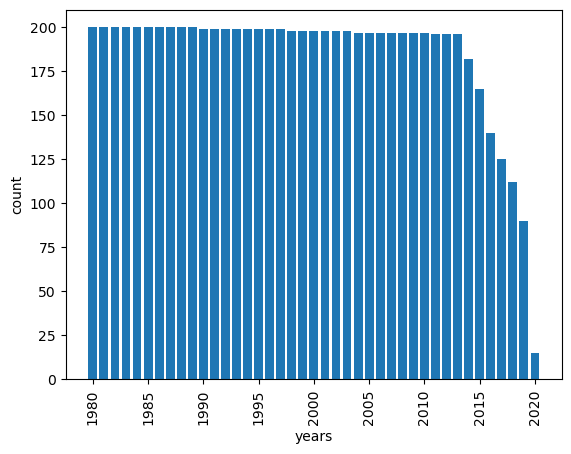

In [25]:
plt.bar(df['year'].unique(),df['year'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('years')
plt.ylabel('count')
plt.show()
##Afficher le nombre des films par rapport les années de production

In [26]:
result=df.groupby('year').sum()
result['budget']

year
1980    1.471850e+09
1981    1.633450e+09
1982    1.907670e+09
1983    2.006552e+09
1984    2.711105e+09
1985    3.320510e+09
1986    3.259787e+09
1987    3.272543e+09
1988    3.116540e+09
1989    3.414763e+09
1990    3.836503e+09
1991    4.009248e+09
1992    3.992378e+09
1993    3.844450e+09
1994    4.741455e+09
1995    4.804834e+09
1996    5.299580e+09
1997    6.259945e+09
1998    6.509766e+09
1999    7.412940e+09
2000    7.044250e+09
2001    7.133900e+09
2002    6.902629e+09
2003    7.396430e+09
2004    7.858327e+09
2005    7.819494e+09
2006    7.912700e+09
2007    7.947510e+09
2008    8.074730e+09
2009    8.131500e+09
2010    8.345750e+09
2011    8.708730e+09
2012    8.554295e+09
2013    8.920670e+09
2014    8.231300e+09
2015    8.169126e+09
2016    9.646000e+09
2017    8.795700e+09
2018    8.188980e+09
2019    8.063050e+09
2020    9.675050e+08
Name: budget, dtype: float64

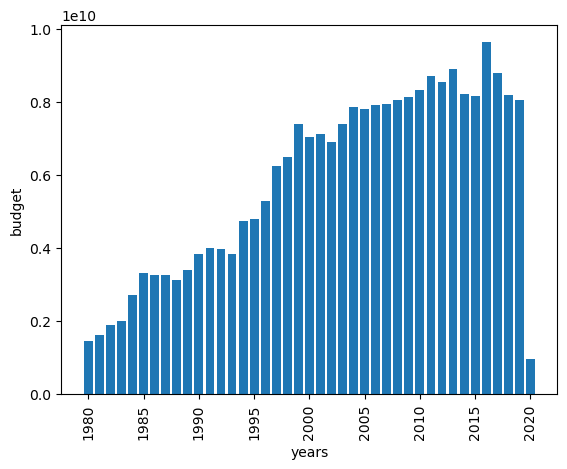

In [27]:
years = [year for year , df in df.groupby('year')]
plt.bar(years,result['budget'])
plt.xticks(rotation=90)
plt.xlabel('years')
plt.ylabel('budget')
plt.show()

##Affichage d'augmentation de budget par rapport aux années de producions
##Nous remarquons que 2016 est l'années avec le budget le plus élevé

In [28]:
res=df.groupby('genre').sum()
res

,year,score,votes,budget,gross,runtime
genre,,,,,,
Action,3395321,10522.6,239483657.0,8.857631e+10,2.435913e+11,186998.0
Adventure,851826,2678.2,43121242.0,1.707506e+10,4.604805e+10,45958.0
Animation,669725,2257.4,42888158.0,2.231907e+10,7.995033e+10,30742.0
Biography,879722,3088.8,40044548.0,1.059816e+10,2.093002e+10,52681.0
Comedy,4456440,13809.5,121779317.0,4.927628e+10,9.813751e+10,226300.0
Crime,1087861,3630.4,49910440.0,1.198724e+10,2.147808e+10,60832.0
Drama,2954516,9888.9,105100945.0,3.281657e+10,5.714296e+10,167087.0
Family,19920,65.4,753400.0,3.305000e+08,2.157876e+09,1008.0
Fantasy,85833,260.1,2558900.0,7.482000e+08,1.668986e+09,4285.0


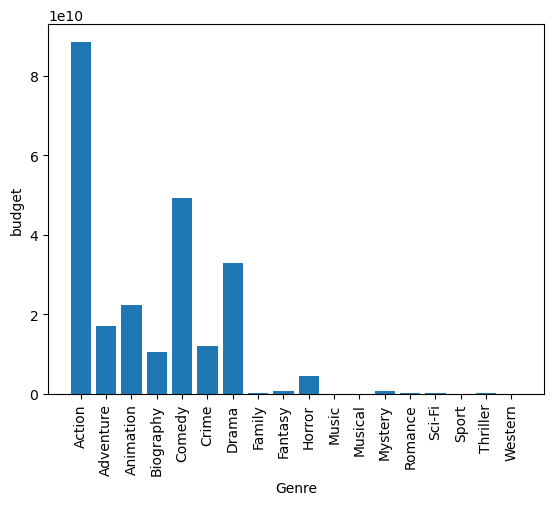

In [29]:
genre = [genre for genre , df in df.groupby('genre')]
plt.bar(genre,res['budget'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('budget')
plt.show()
##budget par rapport au genre 
##nous remarquons que le budget d'un film action est très élevé par rapport au autres genres 

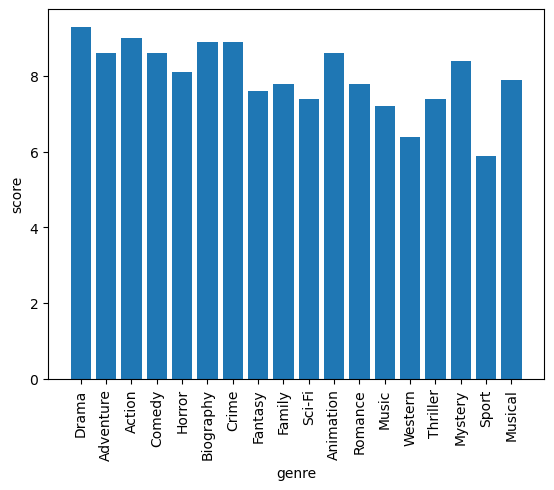

In [30]:
plt.bar(df['genre'],df['score'])
plt.xticks(rotation=90)
plt.xlabel('genre')
plt.ylabel('score')
plt.show()

In [31]:
##Utiliser la bib OrdinalEncoder pour encoder les variables catégoriques
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["genre"] = ord_enc.fit_transform(df[["genre"]])
df["country"] = ord_enc.fit_transform(df[["country"]])
df["company"] = ord_enc.fit_transform(df[["company"]])
df["rating"] = ord_enc.fit_transform(df[["rating"]])
df["director"] = ord_enc.fit_transform(df[["director"]])
df["writer"] = ord_enc.fit_transform(df[["writer"]])
df["star"] = ord_enc.fit_transform(df[["star"]])



df.head(11)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,6.0,6.0,1980,"June 13, 1980 (United States)",8.4,927000.0,2545.0,3960.0,1022.0,54.0,19000000.0,46998772.0,2274.0,146.0
1,The Blue Lagoon,6.0,1.0,1980,"July 2, 1980 (United States)",5.8,65000.0,2234.0,1613.0,316.0,55.0,4500000.0,58853106.0,710.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,4.0,0.0,1980,"June 20, 1980 (United States)",8.7,1200000.0,1093.0,2535.0,1708.0,55.0,18000000.0,538375067.0,1506.0,124.0
3,Airplane!,4.0,4.0,1980,"July 2, 1980 (United States)",7.7,221000.0,1279.0,1976.0,2198.0,55.0,3500000.0,83453539.0,1770.0,88.0
4,Caddyshack,6.0,4.0,1980,"July 25, 1980 (United States)",7.3,108000.0,1037.0,511.0,398.0,55.0,6000000.0,39846344.0,1737.0,98.0
5,Friday the 13th,6.0,9.0,1980,"May 9, 1980 (United States)",6.4,123000.0,2487.0,4306.0,234.0,55.0,550000.0,39754601.0,1770.0,95.0
6,The Blues Brothers,6.0,0.0,1980,"June 20, 1980 (United States)",7.9,188000.0,1390.0,822.0,1250.0,55.0,27000000.0,115229890.0,2237.0,133.0
7,Raging Bull,6.0,3.0,1980,"December 19, 1980 (United States)",8.2,330000.0,1800.0,1748.0,2192.0,55.0,18000000.0,23402427.0,612.0,129.0
8,Superman II,4.0,0.0,1980,"June 19, 1981 (United States)",6.8,101000.0,2268.0,1956.0,855.0,55.0,54000000.0,108185706.0,861.0,127.0
9,The Long Riders,6.0,3.0,1980,"May 16, 1980 (United States)",7.0,10000.0,2817.0,413.0,572.0,55.0,10000000.0,15795189.0,2228.0,100.0


In [32]:
##Création de dataset de prediction
cols = ["year","score","votes","gross","budget","runtime","genre","country","company","rating","star"]; 
train_data = df
train_data = train_data[cols] 
train_data.head()

,year,score,votes,gross,budget,runtime,genre,country,company,rating,star
0,1980,8.4,927000.0,46998772.0,19000000.0,146.0,6.0,54.0,2274.0,6.0,1022.0
1,1980,5.8,65000.0,58853106.0,4500000.0,104.0,1.0,55.0,710.0,6.0,316.0
2,1980,8.7,1200000.0,538375067.0,18000000.0,124.0,0.0,55.0,1506.0,4.0,1708.0
3,1980,7.7,221000.0,83453539.0,3500000.0,88.0,4.0,55.0,1770.0,4.0,2198.0
4,1980,7.3,108000.0,39846344.0,6000000.0,98.0,4.0,55.0,1737.0,6.0,398.0


In [33]:
##Utilisation de bib StandardScaler pour normaliser les valeurs de notre dataset pour faciliter la prediction et avoir des bonnes resultas 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data);
train_data = pd.DataFrame(train_data)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.834533,2.076611,5.109840,-0.186671,-0.352088,2.083093,0.926812,0.364023,1.265829,0.699169,-0.440858
1,-1.834533,-0.608505,-0.145886,-0.114659,-0.756265,-0.177190,-0.975629,0.431984,-0.989438,0.699169,-1.325078
2,-1.834533,2.386432,6.774357,2.798304,-0.379962,0.899135,-1.356117,0.431984,0.158383,-1.045529,0.418314
3,-1.834533,1.353695,0.805266,0.034782,-0.784140,-1.038250,0.165836,0.431984,0.539068,-1.045529,1.032008
4,-1.834533,0.940600,0.116290,-0.230120,-0.714454,-0.500088,0.165836,0.431984,0.491482,0.699169,-1.222378


In [34]:
##Dataset training 
from sklearn.model_selection import train_test_split
x=train_data.drop(4 , axis=1)
y=train_data[4]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
##prediction avec LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score , recall_score , accuracy_score , r2_score 

model = LinearRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)

print(r2_score(y_test, pred))
print(model.score(x_test, y_test))

0.6618058462662926
0.6618058462662926


In [32]:
##Affichage de resultat de prediction par rapport nos données actuelles 
def plotPred(y_true,y_pred):
    plt.figure(figsize=(5,5))
    plt.scatter(y_true, y_pred, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_pred), max(y_true))
    p2 = min(min(y_pred), min(y_true))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

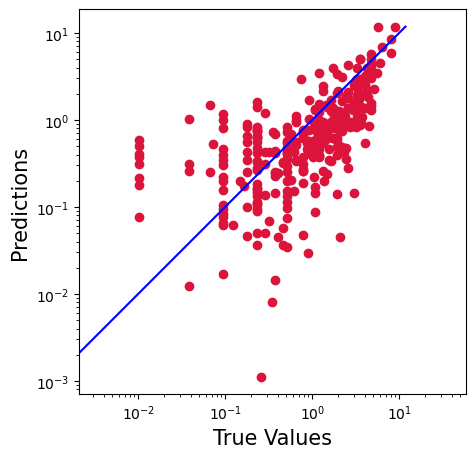

In [33]:
plotPred(y_test,pred)

In [39]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape

In [36]:
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, BayesianRidge,ARDRegression
from sklearn.metrics import r2_score, mean_squared_error
##prediction avec Ridge
model1 = Ridge(alpha=0.00001)
# training
model1.fit(x_train, y_train)
# prediction
pred2 = model1.predict(x_test)
# evaluation
print(model1)
print('  Train R2 = ', '%.3f' %r2_score(y_test,pred2))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_test,pred2)))
print('  Train MAPE = ', '%.0f' %MAPE(y_test,pred2))
     

Ridge(alpha=1e-05)
  Train R2 =  0.662
  Train RMSE =  6.213E-01
  Train MAPE =  1


In [40]:
##prediction avec XGBRegressor
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(x_train, y_train)
preds = my_model.predict(x_test)
print('  Train R2 = ', '%.3f' %r2_score(y_test, preds))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_test,preds)))
print('  Train MAPE = ', '%.0f' %MAPE(y_test,preds))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



  Train R2 =  0.761
  Train RMSE =  5.225E-01
  Train MAPE =  1


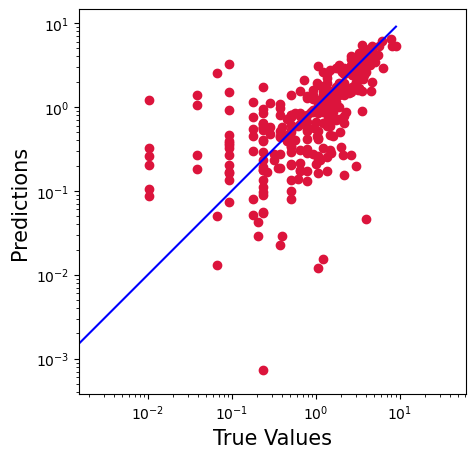

In [38]:
plotPred(y_test,preds)

In [41]:
# choix de modele
model2 = RidgeCV()
# training
model2.fit(x_train, y_train)
# prediction
y_train_pred = model2.predict(x_test)
# evaluations
print(model2)
print('  Train R2 = ', '%.3f' %r2_score(y_test, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_test,y_train_pred)))
print('  Train MAPE = ', '%.0f' %MAPE(y_test,y_train_pred))

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
  Train R2 =  0.662
  Train RMSE =  6.211E-01
  Train MAPE =  1


In [42]:
# choix de modele
model3 = Lasso(alpha=0.01)
# training
model3.fit(x_train, y_train)
# prediction
y_train_pred = model3.predict(x_test)
# evaluations
print(model3)
print('  Train R2 = ', '%.3f' %r2_score(y_test, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_test,y_train_pred)))
print('  Train MAPE = ', '%.0f' %MAPE(y_test,y_train_pred))

Lasso(alpha=0.01)
  Train R2 =  0.662
  Train RMSE =  6.213E-01
  Train MAPE =  1


In [168]:
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()
lr_params={}
lr_grid=GridSearchCV(lr,lr_params,cv=10,verbose=10)
lr_grid.fit(x_train,y_train)
lr_score=lr_grid.cv_results_
print(lr_score)
preds=lr_grid.predict(x_test)
print(preds)
print('  Train R2 = ', '%.3f' %r2_score(y_test, preds))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y_test,preds)))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START ...........................................................
[CV 1/10; 1/1] END ............................., score=0.621 total time=   0.0s
[CV 2/10; 1/1] START ...........................................................
[CV 2/10; 1/1] END ............................., score=0.574 total time=   0.0s
[CV 3/10; 1/1] START ...........................................................
[CV 3/10; 1/1] END ............................., score=0.695 total time=   0.0s
[CV 4/10; 1/1] START ...........................................................
[CV 4/10; 1/1] END ............................., score=0.602 total time=   0.0s
[CV 5/10; 1/1] START ...........................................................
[CV 5/10; 1/1] END ............................., score=0.592 total time=   0.0s
[CV 6/10; 1/1] START ...........................................................
[CV 6/10; 1/1] END .............................

# Nous avons utilisé 6 modèles de prédiction dans ce projet et le meilleur score que nous avons obtenu est 0.761 avec le modèle XGBRegressor.

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [95]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
hist = model.fit(x_train,y_train,epochs=20,validation_data=(x_test, y_test))
model.evaluate(x_test,y_test,verbose=2)

Epoch 1/20
190/190 [==============================] - 1s 3ms/step - loss: 0.2569 - accuracy: 0.0000e+00 - val_loss: 0.2967 - val_accuracy: 0.0000e+00
Epoch 2/20
190/190 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.0000e+00 - val_loss: 0.2952 - val_accuracy: 0.0000e+00
Epoch 3/20
190/190 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.0000e+00 - val_loss: 0.2915 - val_accuracy: 0.0000e+00
Epoch 4/20
190/190 [==============================] - 1s 3ms/step - loss: 0.2470 - accuracy: 0.0000e+00 - val_loss: 0.2894 - val_accuracy: 0.0000e+00
Epoch 5/20
190/190 [==============================] - 1s 3ms/step - loss: 0.2436 - accuracy: 0.0000e+00 - val_loss: 0.2899 - val_accuracy: 0.0000e+00
Epoch 6/20
190/190 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.0000e+00 - val_loss: 0.2897 - val_accuracy: 0.0000e+00
Epoch 7/20
190/190 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.0000e

[0.28212448954582214, 0.0]